## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [====

50000/50000 [==============================] - 52s 1ms/step - loss: 1.4918 - accuracy: 0.5217 - val_loss: 1.5449 - val_accuracy: 0.4984
Epoch 17/25
50000/50000 [==============================] - 52s 1ms/step - loss: 1.4743 - accuracy: 0.5301 - val_loss: 1.5537 - val_accuracy: 0.4953
Epoch 18/25
50000/50000 [==============================] - 55s 1ms/step - loss: 1.4586 - accuracy: 0.5352 - val_loss: 1.5424 - val_accuracy: 0.5025
Epoch 19/25
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4438 - accuracy: 0.5407 - val_loss: 1.5442 - val_accuracy: 0.5008
Epoch 20/25
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4268 - accuracy: 0.5451 - val_loss: 1.5272 - val_accuracy: 0.5053
Epoch 21/25
50000/50000 [==============================] - 54s 1ms/step - loss: 1.4084 - accuracy: 0.5515 - val_loss: 1.5159 - val_accuracy: 0.5098
Epoch 22/25
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3967 - accuracy: 0.5569 - val_loss: 1.5408

50000/50000 [==============================] - 48s 968us/step - loss: 1.5695 - accuracy: 0.4489 - val_loss: 1.5842 - val_accuracy: 0.4348
Epoch 7/25
50000/50000 [==============================] - 48s 968us/step - loss: 1.5352 - accuracy: 0.4610 - val_loss: 1.5427 - val_accuracy: 0.4505
Epoch 8/25
50000/50000 [==============================] - 49s 971us/step - loss: 1.5052 - accuracy: 0.4715 - val_loss: 1.5588 - val_accuracy: 0.4536
Epoch 9/25
50000/50000 [==============================] - 53s 1ms/step - loss: 1.4780 - accuracy: 0.4825 - val_loss: 1.5048 - val_accuracy: 0.4633
Epoch 10/25
50000/50000 [==============================] - 48s 968us/step - loss: 1.4526 - accuracy: 0.4893 - val_loss: 1.4884 - val_accuracy: 0.4721
Epoch 11/25
50000/50000 [==============================] - 48s 968us/step - loss: 1.4293 - accuracy: 0.4974 - val_loss: 1.4687 - val_accuracy: 0.4797
Epoch 12/25
50000/50000 [==============================] - 49s 971us/step - loss: 1.4058 - accuracy: 0.5056 - val_los

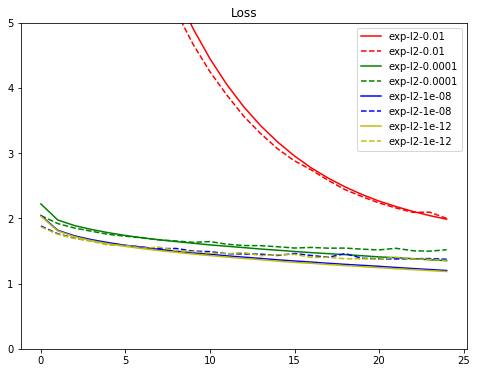

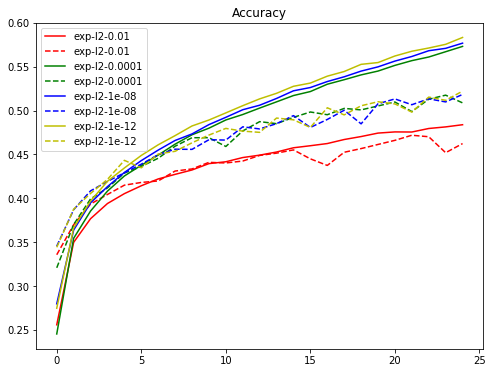

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()